In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [410]:
actual_data_for_test= pd.read_csv("IECSE-ML-Winter-19/Logistic Regression Assignment/gender_submission.csv")
train_data=pd.read_csv("IECSE-ML-Winter-19/Logistic Regression Assignment/train.csv")
test_data=pd.read_csv("IECSE-ML-Winter-19/Logistic Regression Assignment/test.csv")
lr = 0.01
#filling all NaN with 0
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)

In [411]:
target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [412]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [413]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [414]:
train_data.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [415]:
#test.Survived.value_counts()-->error#thats what we find

In [416]:
target.Survived.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [417]:
train_data.shape

(891, 12)

In [418]:
test_data.shape

(418, 11)

In [419]:
#creating dummy variables
train_data_sex = pd.get_dummies(train_data['Sex'])
train_data_new = pd.concat([train_data, train_data_sex], axis=1)
train_data_new = train_data_new.drop('Sex', axis=1)

train_data_em = pd.get_dummies(train_data_new['Embarked'])
train_data_new = pd.concat([train_data_new, train_data_em], axis=1)
train_data_new = train_data_new.drop('Embarked', axis=1)

train_data_new = train_data_new.drop('Ticket', axis=1)
train_data_new = train_data_new.drop('Name', axis=1)
train_data_new = train_data_new.drop('Cabin', axis=1)
train_data_new = train_data_new.drop('PassengerId',axis=1)



In [420]:
norm = (train_data_new-train_data_new.mean())/(train_data_new.max()-train_data_new.min())#normalised train data 
#including Survived column
features =norm.drop('Survived', axis=1)
targets =train_data_new.iloc[:,0:1]
features

,Pclass,Age,SibSp,Parch,Fare,female,male,0,C,Q,S
0,0.345679,-0.022491,0.059624,-0.063599,-0.048707,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
1,-0.654321,0.177509,0.059624,-0.063599,0.076277,0.647587,-0.647587,-0.002245,0.811448,-0.08642,-0.722783
2,0.345679,0.027509,-0.065376,-0.063599,-0.047390,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
3,-0.654321,0.140009,0.059624,-0.063599,0.040786,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
4,0.345679,0.140009,-0.065376,-0.063599,-0.047146,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.154321,0.040009,-0.065376,-0.063599,-0.037484,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
887,-0.654321,-0.059991,-0.065376,-0.063599,-0.004302,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
888,0.345679,-0.297491,0.059624,0.269734,-0.017087,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
889,-0.654321,0.027509,-0.065376,-0.063599,-0.004302,-0.352413,0.352413,-0.002245,0.811448,-0.08642,-0.722783


In [421]:
features=np.array(features)
targets=np.array(targets)
print(features.shape,targets.shape)

(891, 11) (891, 1)


In [422]:
weights = np.zeros([11,1])
weights.shape

(11, 1)

In [423]:
def predict(features, weights):
    z = np.dot(features, weights)
    predictions=1/(1+np.exp(-z))
    return predictions

In [424]:
features

array([[ 0.34567901, -0.02249116,  0.05962402, ..., -0.18855219,
        -0.08641975,  0.27721661],
       [-0.65432099,  0.17750884,  0.05962402, ...,  0.81144781,
        -0.08641975, -0.72278339],
       [ 0.34567901,  0.02750884, -0.06537598, ..., -0.18855219,
        -0.08641975,  0.27721661],
       ...,
       [ 0.34567901, -0.29749116,  0.05962402, ..., -0.18855219,
        -0.08641975,  0.27721661],
       [-0.65432099,  0.02750884, -0.06537598, ...,  0.81144781,
        -0.08641975, -0.72278339],
       [ 0.34567901,  0.10250884, -0.06537598, ..., -0.18855219,
         0.91358025, -0.72278339]])

In [425]:
weights

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [426]:
predict(features, weights)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [427]:
# loss=cost (h(x),y)=-y(log(h(x)))-(1-y)log(1-h(x));y=targets(0 or 1);h(x)=predictions(0 to 1)
#J(theta)=-loss/m;N=no.of training examples=m;J(theta) for logistic regression=mse for linear regression
def loss_function(features, targets, weights):
    N = len(targets)#891
    predictions = predict(features, weights)
    loss = targets*np.log(predictions)+(1-targets)*np.log(1-predictions)
    mse=(-1/N)*loss.sum()
  
    return mse

In [428]:
features.shape

(891, 11)

In [429]:
#gradient descent looks same as for linear but is diff as h(x)is diff in both cases
#features.T -->x(i)
#(11,891)*(891,1)---->(11,1)--->thetas
def update_weights(features, targets, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - targets)
    gradient /= N
    gradient *= lr
    weights -= gradient
    
    return weights

In [430]:
def train(features,targets, weights, lr, iters=10000):
    cost_history = []

    for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)    
    return cost_history,weights

In [431]:
mse,weights=train(features,targets, weights, lr, iters=10000)

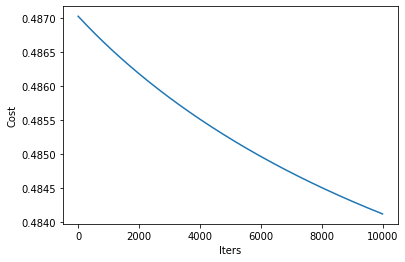

In [432]:
cost_history=[]
for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)
        
arr =[]
for i in range(1,10001):
    arr.append(i)
plt.plot(arr,cost_history)
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

In [433]:
weights

array([[-1.80487755],
       [-0.67695262],
       [-0.71650169],
       [-0.33462938],
       [ 0.38704655],
       [ 1.33520249],
       [-1.33520249],
       [ 0.0777058 ],
       [ 0.24811252],
       [-0.0688422 ],
       [-0.25697612]])

In [434]:
predictions=predict(features, weights)
predictions

array([[0.15416455],
       [0.96049613],
       [0.73581434],
       [0.93688556],
       [0.15159547],
       [0.22486572],
       [0.48876642],
       [0.14710136],
       [0.71233351],
       [0.92133053],
       [0.74493577],
       [0.92907014],
       [0.16865168],
       [0.10843142],
       [0.75506577],
       [0.84389109],
       [0.16072196],
       [0.37289973],
       [0.71096281],
       [0.85181339],
       [0.30871309],
       [0.30842311],
       [0.78677919],
       [0.5405871 ],
       [0.70310229],
       [0.63924469],
       [0.28465035],
       [0.50762454],
       [0.80728038],
       [0.19370837],
       [0.63653936],
       [0.97260035],
       [0.80726519],
       [0.25347357],
       [0.64873661],
       [0.49178628],
       [0.284651  ],
       [0.16746857],
       [0.71514537],
       [0.82403098],
       [0.69369845],
       [0.86278513],
       [0.28475355],
       [0.92061962],
       [0.78102651],
       [0.19372657],
       [0.210523  ],
       [0.807

In [435]:
targets#if we compare targets with predictions they are almost 
#similar hence now we can say our model is trained

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [436]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(targets -predictions)) * 100))

train accuracy: 68.12676860431614 %
